In [1]:
import scanpy as sc
from anndata import AnnData
import numpy as np
# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep
import pandas as pd

20230111-081133.917 9456 INFO root:17 local study files stored in: /home/mahmoud_ibrahim/code/cellenium/scratch


In [2]:
url = "https://figshare.com/ndownloader/files/23872526"
adata = prep.get_h5ad_from_url(url, "tabula_muris_senis_liver")

In [3]:
prep.jupyter_h5ad_overview(adata)

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A10_B000767_B009945_S10.mm10-plus-4-0,Viable,18m,A10_B000767,hepatocyte,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs,Liver,880,3425697.0,7,7
A10_D045313_B009942_S10.mm10-plus-4-0,Viable,18m,A10_D045313,hepatocyte,nan,nan,facs,18_45_M,male,Liver non-hepato/SCs_st,Liver,1151,1517490.0,8,4
A11_B000767_B009945_S11.mm10-plus-4-0,Viable,18m,A11_B000767,myeloid leukocyte,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs,Liver,2946,7940638.0,3,12
A11_B001247_B009941_S11.mm10-plus-4-0,Viable,18m,A11_B001247,endothelial cell of hepatic sinusoid,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs_st,Liver,817,377537.0,13,16
A11_B002688_B009944_S11.mm10-plus-4-0,Viable,18m,A11_B002688,endothelial cell of hepatic sinusoid,nan,nan,facs,18_53_M,male,Liver non-hepato/SCs,Liver,2933,2801436.0,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P5.MAA000907.3_11_M.1.1-1-1,nan,3m,P5.MAA000907.3_11_M.1.1,endothelial cell of hepatic sinusoid,CL:1000398,nan,facs,3_11_M,male,Non-hepatocytes,Liver,1222,104731.0,13,16
P6.MAA000907.3_11_M.1.1-1-1,nan,3m,P6.MAA000907.3_11_M.1.1,B cell,CL:0000236,B cell,facs,3_11_M,male,Non-hepatocytes,Liver,1902,275417.0,6,1
P7.MAA000907.3_11_M.1.1-1-1,nan,3m,P7.MAA000907.3_11_M.1.1,endothelial cell of hepatic sinusoid,CL:0000182,nan,facs,3_11_M,male,Non-hepatocytes,Liver,1021,133609.0,13,16


,n_cells,means,dispersions,dispersions_norm,highly_variable
index,,,,,
0610005C13Rik,805,0.594498,1.915840,-0.170678,False
0610007C21Rik,1281,0.831195,1.831768,-0.568851,False
0610007L01Rik,846,0.344973,1.605082,0.522063,True
0610007N19Rik,54,0.010113,1.856694,0.641167,False
0610007P08Rik,308,0.058863,1.219318,0.339457,False
...,...,...,...,...,...
Zyg11a,63,0.003285,1.313830,0.384195,False
Zyg11b,649,0.164135,1.517642,0.480673,False
Zyx,1223,0.834286,2.465299,0.473558,False


(2859, 17098)

<2859x17098 sparse matrix of type '<class 'numpy.float32'>'
	with 7493318 stored elements in Compressed Sparse Row format>

OverloadedDict, wrapping:
	{'age_colors': array(['#e1f3b2', '#97d6b9', '#1f80b8'], dtype=object), 'cell_ontology_class_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78'],
      dtype=object), 'cellenium': {'X_pseudolayer_name': 'norm_log_expression', 'description': 'Mouse liver from the Tabula Muris Senis Consortium', 'differentially_expressed_genes':           names     scores  logfoldchanges     pvals  pvals_adj  \
0         Apoa1  42.989605        3.588933  0.000000   0.000000   
1     Serpina1c  42.848248        4.182104  0.000000   0.000000   
2           Ttr  42.818401        4.377194  0.000000   0.000000   
3          Rbp4  42.777393        4.461710  0.000000   0.000000   
4         Apoa2  42.630615        3.719623  0.000000   0.000000   
...         ...        ...             ...       ...        ...   
5151      Foxp1   1.778590        2.084637  0.075307   0.795187   
5152    H2-DMb1  

20230111-081135.967 9456 INFO root:118 make_norm_expression: no transformations necessary


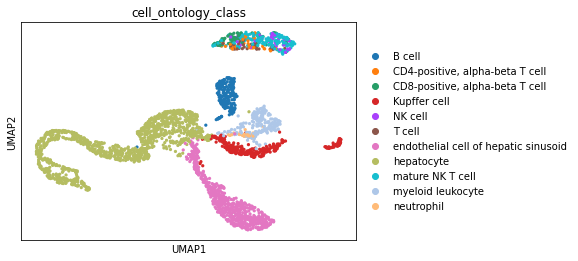

In [4]:
prep.remove_raw_and_layers(adata)
prep.make_sparse(adata)
prep.filter_outliers(adata)
prep.make_norm_expression(adata)

prep.add_umap(adata)
sc.pl.umap(adata, color='cell_ontology_class')

In [5]:
prep.calculate_differentially_expressed_genes(adata, ['cell_ontology_class','free_annotation','louvain','leiden'])

diff.exp. genes:  75%|███████▌  | 3/4 [00:13<00:04,  4.67s/it]/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/scanpy

,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,Apoa1,42.989605,3.588933,0.000000,0.000000,hepatocyte,_OTHERS_,cell_ontology_class
1,Serpina1c,42.848248,4.182104,0.000000,0.000000,hepatocyte,_OTHERS_,cell_ontology_class
2,Ttr,42.818401,4.377194,0.000000,0.000000,hepatocyte,_OTHERS_,cell_ontology_class
3,Rbp4,42.777393,4.461710,0.000000,0.000000,hepatocyte,_OTHERS_,cell_ontology_class
4,Apoa2,42.630615,3.719623,0.000000,0.000000,hepatocyte,_OTHERS_,cell_ontology_class
...,...,...,...,...,...,...,...,...
5151,Foxp1,1.778590,2.084637,0.075307,0.795187,21,_OTHERS_,leiden
5152,H2-DMb1,1.679751,1.263609,0.093006,0.839313,21,_OTHERS_,leiden
5153,Rps18,1.675878,1.154838,0.093762,0.841103,21,_OTHERS_,leiden
5154,Lsp1,1.659882,1.618269,0.096938,0.847412,21,_OTHERS_,leiden


# final h5ad file

In [6]:
prep.set_cellenium_metadata(
    adata,
    title='Tabula Muris Senis - Liver',
    description='Mouse liver from the Tabula Muris Senis Consortium',
    taxonomy_id=10090,
    ncit_tissue_ids=['C12392'],
    mesh_disease_ids=[],
    X_pseudolayer_name='norm_log_expression',
    main_sample_attributes=['cell_ontology_class', 'free_annotation']
)   

In [7]:
adata.write(prep.basedir.joinpath("tabula_muris_senis_liver.h5ad"))
prep.jupyter_h5ad_overview(adata)

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A10_B000767_B009945_S10.mm10-plus-4-0,Viable,18m,A10_B000767,hepatocyte,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs,Liver,880,3425697.0,7,7
A10_D045313_B009942_S10.mm10-plus-4-0,Viable,18m,A10_D045313,hepatocyte,nan,nan,facs,18_45_M,male,Liver non-hepato/SCs_st,Liver,1150,1517490.0,8,4
A11_B000767_B009945_S11.mm10-plus-4-0,Viable,18m,A11_B000767,myeloid leukocyte,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs,Liver,2940,7940638.0,3,12
A11_B001247_B009941_S11.mm10-plus-4-0,Viable,18m,A11_B001247,endothelial cell of hepatic sinusoid,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs_st,Liver,817,377537.0,13,16
A11_B002688_B009944_S11.mm10-plus-4-0,Viable,18m,A11_B002688,endothelial cell of hepatic sinusoid,nan,nan,facs,18_53_M,male,Liver non-hepato/SCs,Liver,2933,2801436.0,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P5.MAA000907.3_11_M.1.1-1-1,nan,3m,P5.MAA000907.3_11_M.1.1,endothelial cell of hepatic sinusoid,CL:1000398,nan,facs,3_11_M,male,Non-hepatocytes,Liver,1222,104731.0,13,16
P6.MAA000907.3_11_M.1.1-1-1,nan,3m,P6.MAA000907.3_11_M.1.1,B cell,CL:0000236,B cell,facs,3_11_M,male,Non-hepatocytes,Liver,1902,275417.0,6,1
P7.MAA000907.3_11_M.1.1-1-1,nan,3m,P7.MAA000907.3_11_M.1.1,endothelial cell of hepatic sinusoid,CL:0000182,nan,facs,3_11_M,male,Non-hepatocytes,Liver,1018,133609.0,13,16


,n_cells,means,dispersions,dispersions_norm,highly_variable
index,,,,,
0610005C13Rik,805,0.594498,1.915840,-0.170678,False
0610007C21Rik,1281,0.831195,1.831768,-0.568851,False
0610007L01Rik,846,0.344973,1.605082,0.522063,True
0610007N19Rik,54,0.010113,1.856694,0.641167,False
0610007P08Rik,308,0.058863,1.219318,0.339457,False
...,...,...,...,...,...
Zyg11a,63,0.003285,1.313830,0.384195,False
Zyg11b,649,0.164135,1.517642,0.480673,False
Zyx,1223,0.834286,2.465299,0.473558,False


(2859, 17098)

<2859x17098 sparse matrix of type '<class 'numpy.float32'>'
	with 7493318 stored elements in Compressed Sparse Row format>

OverloadedDict, wrapping:
	{'age_colors': array(['#e1f3b2', '#97d6b9', '#1f80b8'], dtype=object), 'cell_ontology_class_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78'],
      dtype=object), 'cellenium': {'X_pseudolayer_name': 'norm_log_expression', 'description': 'Mouse liver from the Tabula Muris Senis Consortium', 'differentially_expressed_genes':           names     scores  logfoldchanges     pvals  pvals_adj  \
0         Apoa1  42.989605        3.588933  0.000000   0.000000   
1     Serpina1c  42.848248        4.182104  0.000000   0.000000   
2           Ttr  42.818401        4.377194  0.000000   0.000000   
3          Rbp4  42.777393        4.461710  0.000000   0.000000   
4         Apoa2  42.630615        3.719623  0.000000   0.000000   
...         ...        ...             ...       ...        ...   
5151      Foxp1   1.778590        2.084637  0.075307   0.795187   
5152    H2-DMb1  